In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.shape

(319795, 18)

# Removing Duplicate value


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [4]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with LabelEncoder


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separting x and y

In [7]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [8]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling


In [10]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [11]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [12]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [13]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [14]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [15]:
HeartDisease_no.shape

(274456, 18)

In [16]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques



In [17]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)
x_new,y_new=random_over_sampler.fit_resample(x,y)

In [18]:
x1_new=x2_new=x3_new=x4_new=x5_new=x6_new=x7_new=x8_new=x9_new=x_new
x_new

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [19]:
y1_new=y2_new=y3_new=y4_new=y5_new=y6_new=y7_new=y8_new=y9_new=y_new
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [20]:
x_new.shape

(548912, 17)

In [21]:
y_new.shape

(548912,)

# 5-> XGBoost Classifier Algorithm Implementation


# XGBoost Classifier for holdout cross validation with Randon Over Sampling

In [22]:
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [23]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x4_new,y4_new,test_size = 0.30 ,random_state =42)
xgb.fit(over_xtrain,over_ytrain)

C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
OverSampleing_dataset_accuracy4 = xgb.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy4

0.7809976073940027

# XGBoost for KFold cross validation for Random Over sampling


In [55]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
OverSampleingDataset_kfold_result4= cross_val_score(xgb,x4_new,y4_new,cv = kfold)
OverSampleingDataset_kfold_result4

[22:19:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
OverSampleingDataset_kfold_result4.mean()

# XGBoost for StratiFied KFold cross validation for Over sampling

In [31]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [32]:
OverSampleingDataset_Sf_kfold_result4 = cross_val_score(xgb,x4_new,y4_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result4

C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.78337463, 0.77780004, 0.78076552, 0.77661183, 0.78220473,
       0.77222131, 0.7879616 , 0.77225775, 0.78701426, 0.77710371])

In [33]:
OverSampleingDataset_Sf_kfold_result4.mean()

0.7797315385497254

# Now from over sampling ,we calculate all confusion matrix performance


In [34]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
xgb.fit(over_xtrain,over_ytrain)

C:\Users\WIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
pred_y4=xgb.predict(over_xtest)#Predicted Class 
pred_y4

array([1, 1, 0, ..., 1, 1, 1])

In [36]:
over_ytest

374936    1
319916    1
56188     0
444156    1
170814    0
         ..
285161    0
217312    1
353792    1
318432    1
216193    0
Name: HeartDisease, Length: 164674, dtype: int32

In [37]:
np.array(over_ytest) #actual class/y

array([1, 1, 0, ..., 1, 1, 0])

In [38]:
print(classification_report(over_ytest,pred_y4))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     82143
           1       0.76      0.83      0.79     82531

    accuracy                           0.78    164674
   macro avg       0.78      0.78      0.78    164674
weighted avg       0.78      0.78      0.78    164674



In [39]:
cm4=confusion_matrix(over_ytest,pred_y4)
cm4

array([[60504, 21639],
       [14425, 68106]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for XGBoost


Text(33.0, 0.5, 'Actual Values')

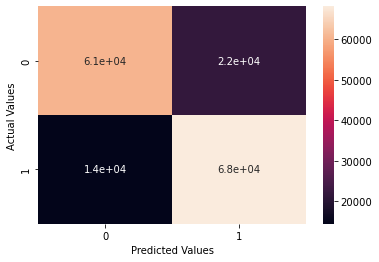

In [40]:
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [41]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y4).reshape(-1)

In [42]:
tp

60504

In [43]:
fn

21639

In [44]:
fp

14425

In [45]:
tn

68106

# Accuracy

In [46]:
(tn+tp)/(tp+fn+fp+tn)

0.7809976073940027

In [47]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.8074844185829252


In [48]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.736569153792776


In [49]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.17478280888393452


In [50]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.7703982886828971


In [51]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.8252171911160655


In [52]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.6265429541877227


In [53]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.19251558141707484


# Roc and Auc curve for XGBoost classifier

C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


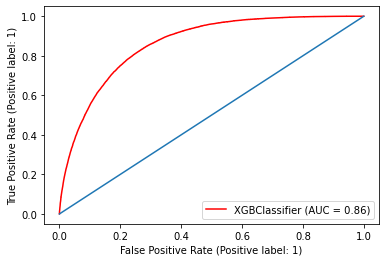

In [54]:
plot_roc_curve(xgb,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])

# Tuning XGBoost Classifier Algorithm using Randomized Search CV


# Assign parameters